<a href="https://colab.research.google.com/github/jacobpad/Labs-Stuff/blob/master/Elon_Musk_twitter_followers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""FOR USE IN COLAB"""
# !pip install squarify
# !python -m spacy download en_core_web_lg

In [1]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [2]:
import pandas as pd


# Establish the URL
url = 'https://raw.githubusercontent.com/jacobpad/Labs-Stuff/master/elonmusk_followers.json'

# Read in data
df = pd.read_json(url, orient='index')
df = df.reset_index()
df = df.rename(columns={'index':'date_time', 0:'tweet'})

# View
df

,date_time,tweet
0,2009-12-02 20:21:58.720581632,"#POCOF2Pro debuts in just 24 hours, RT now and..."
1,2009-11-29 10:35:18.161358848,@jairbolsonaro Imagina o desgosto dela 😭
2,2009-11-26 13:35:43.772033030,É inacreditável que um presidente da República...
3,2009-11-25 21:55:37.505153024,"@CarlaZambelli38 Mente, desmente, e mente de n..."
4,2009-11-22 21:56:13.574885376,Pq Bolsonaro não apresenta o exame do coronaví...
...,...,...
20494,2009-11-13 10:53:42.147219457,"Знайте, суки!... https://t.co/hn8T7vvZEw"
20495,2009-11-11 18:18:48.847269891,@Kasinbatya @krivorozhanin__ хуйня порохоскотс...
20496,2009-11-11 12:24:25.416298497,@krivorozhanin__ https://t.co/6KiTXfYbeq
20497,2009-11-11 12:21:53.611726849,@krivorozhanin__ https://t.co/Z5yRf8A5Il


In [3]:
# See 1 tweet
# df['tweet'].iloc[0]

In [4]:
# Apply a first round of text cleaning techniques
import re
import string

'''
# def clean_text_round1(text):
#     """
#     Make text lowercase, remove text in square brackets, remove punctuation 
#     and remove words containing numbers.
#     """
#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = re.sub('\n', '', text)
#     return text

# round1 = lambda x: clean_text_round1(x)

# Let's take a look at the updated text
# df['data_clean'] = pd.DataFrame(df['tweet'].apply(round1))
# df
'''

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens


In [5]:
# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Apply tokenizer
df['tokens'] = df['tweet'].apply(tokenize)

# View
df

,date_time,tweet,tokens
0,2009-12-02 20:21:58.720581632,"#POCOF2Pro debuts in just 24 hours, RT now and...","[pocof2pro, debuts, in, just, 24, hours, rt, n..."
1,2009-11-29 10:35:18.161358848,@jairbolsonaro Imagina o desgosto dela 😭,"[jairbolsonaro, imagina, o, desgosto, dela]"
2,2009-11-26 13:35:43.772033030,É inacreditável que um presidente da República...,"[inacreditvel, que, um, presidente, da, repbli..."
3,2009-11-25 21:55:37.505153024,"@CarlaZambelli38 Mente, desmente, e mente de n...","[carlazambelli38, mente, desmente, e, mente, d..."
4,2009-11-22 21:56:13.574885376,Pq Bolsonaro não apresenta o exame do coronaví...,"[pq, bolsonaro, no, apresenta, o, exame, do, c..."
...,...,...,...
20494,2009-11-13 10:53:42.147219457,"Знайте, суки!... https://t.co/hn8T7vvZEw",[httpstcohn8t7vvzew]
20495,2009-11-11 18:18:48.847269891,@Kasinbatya @krivorozhanin__ хуйня порохоскотс...,"[kasinbatya, krivorozhanin, 3, httpstcodyzdwze..."
20496,2009-11-11 12:24:25.416298497,@krivorozhanin__ https://t.co/6KiTXfYbeq,"[krivorozhanin, httpstco6kitxfybeq]"
20497,2009-11-11 12:21:53.611726849,@krivorozhanin__ https://t.co/Z5yRf8A5Il,"[krivorozhanin, httpstcoz5yrf8a5il]"


In [6]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens_count'] = df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 4710),
 ('a', 4577),
 ('to', 3454),
 ('de', 3080),
 ('i', 2271),
 ('and', 2103),
 ('que', 2010),
 ('you', 2000),
 ('is', 1946),
 ('of', 1933)]

In [7]:
# Count Function to count tokens
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [8]:
word_count_df = count(df['tokens'])
word_count_df

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,the,3518,4710,1.0,0.019384,0.019384,0.171618
16,a,3812,4577,2.0,0.018837,0.038221,0.185960
8,to,2863,3454,3.0,0.014215,0.052436,0.139665
29,de,2233,3080,4.0,0.012676,0.065111,0.108932
328,i,1842,2271,5.0,0.009346,0.074458,0.089858
...,...,...,...,...,...,...,...
60055,httpstcohn8t7vvzew,1,1,60057.0,0.000004,0.999984,0.000049
60057,kasinbatya,1,1,60058.0,0.000004,0.999988,0.000049
60058,httpstcodyzdwzeiyw,1,1,60059.0,0.000004,0.999992,0.000049
60059,httpstco6kitxfybeq,1,1,60060.0,0.000004,0.999996,0.000049


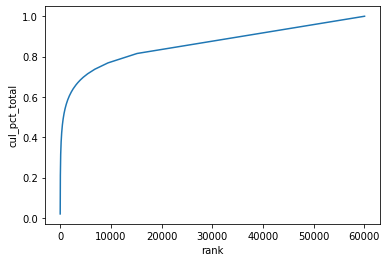

In [9]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=word_count_df);

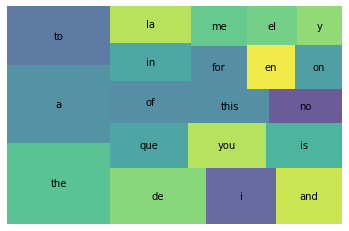

In [10]:
wc_top20 = word_count_df[word_count_df['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [11]:
df

,date_time,tweet,tokens,tokens_count
0,2009-12-02 20:21:58.720581632,"#POCOF2Pro debuts in just 24 hours, RT now and...","[pocof2pro, debuts, in, just, 24, hours, rt, n...",None
1,2009-11-29 10:35:18.161358848,@jairbolsonaro Imagina o desgosto dela 😭,"[jairbolsonaro, imagina, o, desgosto, dela]",None
2,2009-11-26 13:35:43.772033030,É inacreditável que um presidente da República...,"[inacreditvel, que, um, presidente, da, repbli...",None
3,2009-11-25 21:55:37.505153024,"@CarlaZambelli38 Mente, desmente, e mente de n...","[carlazambelli38, mente, desmente, e, mente, d...",None
4,2009-11-22 21:56:13.574885376,Pq Bolsonaro não apresenta o exame do coronaví...,"[pq, bolsonaro, no, apresenta, o, exame, do, c...",None
...,...,...,...,...
20494,2009-11-13 10:53:42.147219457,"Знайте, суки!... https://t.co/hn8T7vvZEw",[httpstcohn8t7vvzew],None
20495,2009-11-11 18:18:48.847269891,@Kasinbatya @krivorozhanin__ хуйня порохоскотс...,"[kasinbatya, krivorozhanin, 3, httpstcodyzdwze...",None
20496,2009-11-11 12:24:25.416298497,@krivorozhanin__ https://t.co/6KiTXfYbeq,"[krivorozhanin, httpstco6kitxfybeq]",None
20497,2009-11-11 12:21:53.611726849,@krivorozhanin__ https://t.co/Z5yRf8A5Il,"[krivorozhanin, httpstcoz5yrf8a5il]",None


In [12]:
# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(['hi','\n','\n\n', '&amp;', 'la',' ',
                                            'que', 'de', 'o', 'y', 'en', 'para',
                                            '.', 'el', 'un', 'los', 'le', 'por', 
                                            'un', 'el'])



In [13]:
tokens = []

for doc in tokenizer.pipe(df['tweet'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

wc = count(df['tokens'])
wc.head(20)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
57,se,571,613,1.0,0.003223,0.003223,0.027855
2348,es,505,555,2.0,0.002918,0.006141,0.024635
506,like,514,543,3.0,0.002855,0.008995,0.025074
391,-,327,489,4.0,0.002571,0.011566,0.015952
2119,con,424,455,5.0,0.002392,0.013958,0.020684
412,people,353,361,6.0,0.001898,0.015856,0.017220
2324,lo,310,350,7.0,0.001840,0.017696,0.015123
2123,una,316,340,8.0,0.001787,0.019484,0.015415
2353,las,301,334,9.0,0.001756,0.021240,0.014684
2330,del,286,308,10.0,0.001619,0.022859,0.013952


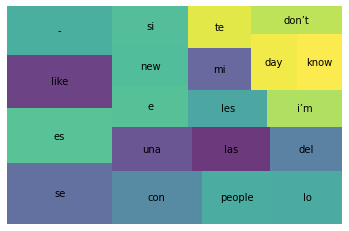

In [14]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()


In [15]:
wcdf = wc.head(20)
wcdf['top_words'] = wcdf['word'].to_list()
wcdf

/Users/jacobpadgett/opt/anaconda3/envs/elon-tweets/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,top_words
57,se,571,613,1.0,0.003223,0.003223,0.027855,se
2348,es,505,555,2.0,0.002918,0.006141,0.024635,es
506,like,514,543,3.0,0.002855,0.008995,0.025074,like
391,-,327,489,4.0,0.002571,0.011566,0.015952,-
2119,con,424,455,5.0,0.002392,0.013958,0.020684,con
412,people,353,361,6.0,0.001898,0.015856,0.017220,people
2324,lo,310,350,7.0,0.001840,0.017696,0.015123,lo
2123,una,316,340,8.0,0.001787,0.019484,0.015415,una
2353,las,301,334,9.0,0.001756,0.021240,0.014684,las
2330,del,286,308,10.0,0.001619,0.022859,0.013952,del


In [16]:
import requests
import json


url = 'https://raw.githubusercontent.com/jacobpad/Labs-Stuff/master/elonmusk_followers.json'

r = requests.get(url)
df = r.json()
df

{'1259785318720581632': '#POCOF2Pro debuts in just 24 hours, RT now and you will have the chance to WIN a #POCOF2Pro\n\nStay tuned for the liv… https://t.co/vSPrCp9uUI',
 '1259490918161358848': '@jairbolsonaro Imagina o desgosto dela 😭',
 '1259242543772033030': 'É inacreditável que um presidente da República vá passear de jet ski em meio a uma pandemia que já deixou 10 mil mo… https://t.co/dZruL9uMHg',
 '1259186137505153024': '@CarlaZambelli38 Mente, desmente, e mente de novo. Esse é o padrão, pena, que gado não possuí a capacidade de raciocínio.',
 '1258926973574885376': 'Pq Bolsonaro não apresenta o exame do coronavírus? Sério. Pq, se deu negativo mesmo, o presidente calaria a boca de… https://t.co/0x53b6mxgm',
 '1258556086237487104': 'Governador de Nova York diz que\n84% das pessoas internadas nos\nhospitais com Covid-19 estavam em suas casas, litera… https://t.co/mmgqeX7ppq',
 '1258395139334115328': '"Lock down" é o caramba. Vamos falar português claro? A tradução mais correta é "T

In [17]:
df = pd.DataFrame(df.values())
col = ['original_tweet']
df = df.rename(columns={0:'original_tweet'})

df

,original_tweet
0,"#POCOF2Pro debuts in just 24 hours, RT now and..."
1,@jairbolsonaro Imagina o desgosto dela 😭
2,É inacreditável que um presidente da República...
3,"@CarlaZambelli38 Mente, desmente, e mente de n..."
4,Pq Bolsonaro não apresenta o exame do coronaví...
...,...
20494,"Знайте, суки!... https://t.co/hn8T7vvZEw"
20495,@Kasinbatya @krivorozhanin__ хуйня порохоскотс...
20496,@krivorozhanin__ https://t.co/6KiTXfYbeq
20497,@krivorozhanin__ https://t.co/Z5yRf8A5Il
